# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [109]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os
from pprint import pprint
# Import API key - DO NOT PUSH TO GitHub

from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [110]:
# List for holding lat_lngs and cities
lat_lngs = []
cities_list = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities_list:
        cities_list.append(city)

# Print the city count to confirm sufficient count
len(cities_list)

603

In [111]:
cities_list

['coihaique',
 'bredasdorp',
 'bur gabo',
 'portsmouth',
 'rikitea',
 'kulhudhuffushi',
 'busselton',
 'vaini',
 'jamestown',
 'punta arenas',
 'san cristobal',
 'hilo',
 'fort saint james',
 'cape town',
 'ushuaia',
 'tsihombe',
 'provideniya',
 'green river',
 'hithadhoo',
 'sindal',
 'hobyo',
 'belushya guba',
 'itarema',
 'tasiilaq',
 'kenora',
 'henties bay',
 'dikson',
 'attawapiskat',
 'albany',
 'sao felix do xingu',
 'egvekinot',
 'tuktoyaktuk',
 'hofn',
 'mar del plata',
 'tura',
 'amderma',
 'longonjo',
 'castro',
 'thompson',
 'talnakh',
 'havoysund',
 'severo-kurilsk',
 'kirakira',
 'hermanus',
 'atuona',
 'port elizabeth',
 'oksfjord',
 'shingu',
 'betafo',
 'clyde river',
 'carnarvon',
 'sept-iles',
 'bac lieu',
 'iqaluit',
 'ojinaga',
 'port hardy',
 'coquimbo',
 'sakakah',
 'iquique',
 'kefamenanu',
 'chuy',
 'tuatapere',
 'sitka',
 'cidreira',
 'bluff',
 'avera',
 'saint-leu',
 'saldanha',
 'omsukchan',
 'hobart',
 'louga',
 'twentynine palms',
 'new norfolk',
 'victo

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [113]:
#The base URL to access the OpenWeather API Data, remove all data after ?
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
base_url='http://api.openweathermap.org/data/2.5/weather?'

#Add API Key and City Name to Query_URL
#query_url=f'{base_url}q={city_name}&appid={weather_api_key}'
# city_name='Denver'
#Dataset Columns: City, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date

city_list_500=[]
lat_500=[]
long_500=[]
max_temp_500=[]
humidity_500=[]
cloudiness_500=[]
wind_speed_500=[]
country_500=[]
date_500=[]
counter=0
group=1

#For loop itterates through list of randomly generated cities, 
#pings the OpenWeather database for each city and appends the cities information to empty lists

for each_city in cities_list[:250]:
    try:
        query_url=f'{base_url}q={each_city}&appid={weather_api_key}'
        weather_response=requests.get(query_url)
        weather_data=weather_response.json()
    #     print(each_city)
#         pprint(weather_data)
        city_list_500.append(weather_data['name'])
        lat_500.append(weather_data['coord']['lat'])
    #     print(lat_500)
        long_500.append(weather_data['coord']['lon'])
        max_temp_500.append(weather_data['main']['temp_max'])
        humidity_500.append(weather_data['main']['humidity'])
        cloudiness_500.append(weather_data['clouds']['all'])
        wind_speed_500.append(weather_data['wind']['speed'])
        country_500.append(weather_data['sys']['country'])
        date_500.append(weather_data['dt'])
        counter+=1
        
        if counter>50:
            counter=1
            group=group+1
        
        print(f'Processing record {counter} of set {group} | {each_city}')
    
    except:
        print('City not found in OpenWeather API.')
        
# print(city_list_500)
# print(lat_500)
# print(long_500)
# print(max_temp_500)
# print(humidity_500)
# print(cloudiness_500)
# print(wind_speed_500)
# print(country_500)
# print(date_500)

#Add API Key and City Name to Query_URL

# city_name='Denver'
#Using 
# parameters={'q': city_name,
#             'aapid':weather_api_key
#           }
# weather_response=requests.get(base_url,params=parameters).json()

Processing record 1 of set 1 | coihaique
Processing record 2 of set 1 | bredasdorp
City not found in OpenWeather API.
Processing record 3 of set 1 | portsmouth
Processing record 4 of set 1 | rikitea
Processing record 5 of set 1 | kulhudhuffushi
Processing record 6 of set 1 | busselton
Processing record 7 of set 1 | vaini
Processing record 8 of set 1 | jamestown
Processing record 9 of set 1 | punta arenas
Processing record 10 of set 1 | san cristobal
Processing record 11 of set 1 | hilo
Processing record 12 of set 1 | fort saint james
Processing record 13 of set 1 | cape town
Processing record 14 of set 1 | ushuaia
City not found in OpenWeather API.
Processing record 15 of set 1 | provideniya
Processing record 16 of set 1 | green river
Processing record 17 of set 1 | hithadhoo
Processing record 18 of set 1 | sindal
Processing record 19 of set 1 | hobyo
City not found in OpenWeather API.
Processing record 20 of set 1 | itarema
Processing record 21 of set 1 | tasiilaq
Processing record 22

Processing record 33 of set 4 | lompoc
Processing record 34 of set 4 | khatanga
Processing record 35 of set 4 | seoul
Processing record 36 of set 4 | thomasville
Processing record 37 of set 4 | miyako
Processing record 38 of set 4 | urumqi
Processing record 39 of set 4 | talcahuano
Processing record 40 of set 4 | batagay-alyta
Processing record 41 of set 4 | palmer
Processing record 42 of set 4 | loukhi
Processing record 43 of set 4 | antofagasta
Processing record 44 of set 4 | ponta do sol
Processing record 45 of set 4 | zalantun
Processing record 46 of set 4 | teguise
Processing record 47 of set 4 | sakaiminato
City not found in OpenWeather API.
Processing record 48 of set 4 | laguna
Processing record 49 of set 4 | hambantota
Processing record 50 of set 4 | alihe
Processing record 1 of set 5 | buala
Processing record 2 of set 5 | la rioja
Processing record 3 of set 5 | maltahohe
Processing record 4 of set 5 | cabo san lucas
Processing record 5 of set 5 | dingle
Processing record 6 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [114]:
#Create original data frame for the weather data from the generated lists
weather_data_dict={'City':city_list_500,
                      'Latitude':lat_500,
                      'Longitude':long_500,
                      'Max Temp':max_temp_500,
                      'Humidity':humidity_500,
                      'Cloudiness':cloudiness_500,
                      'Wind Speed':wind_speed_500,
                      'Country':country_500,
                      'Date':date_500
                     }

weather_0_df=pd.DataFrame(weather_data_dict)
weather_0_df.head(10)

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Coyhaique,-45.5752,-72.0662,285.15,47,0,5.66,CL,1611804167
1,Bredasdorp,-34.5322,20.0403,282.15,81,6,1.35,ZA,1611804341
2,Portsmouth,50.7990,-1.0913,283.71,97,100,0.45,GB,1611804163
3,Rikitea,-23.1203,-134.9692,299.60,73,100,4.60,PF,1611804160
4,Kulhudhuffushi,6.6221,73.0700,300.19,67,0,5.48,MV,1611804246
5,Busselton,-33.6500,115.3333,296.48,49,29,0.45,AU,1611804103
6,Vaini,-21.2000,-175.2000,296.15,83,90,2.06,TO,1611804342
7,Jamestown,42.0970,-79.2353,267.59,86,90,1.71,US,1611804519
8,Punta Arenas,-53.1500,-70.9167,279.15,81,90,7.20,CL,1611803960
9,San Cristobal,7.7669,-72.2250,290.94,80,43,0.68,VE,1611804342


In [115]:
#Print a describe table for the weather data frame
weather_0_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,2.270000e+02
mean,19.670344,7.733114,280.476960,73.713656,55.792952,3.744934,1.611804e+09
std,36.339711,96.415324,19.652451,18.302810,41.761505,2.594476,9.307597e+01
min,-54.800000,-179.166700,228.010000,12.000000,0.000000,0.190000,1.611804e+09
25%,-10.127200,-71.029300,269.865000,65.500000,1.000000,1.550000,1.611804e+09
50%,25.519800,15.253300,286.150000,78.000000,75.000000,3.140000,1.611804e+09
75%,50.689250,89.308650,296.605000,87.000000,93.000000,5.185000,1.611804e+09
max,77.484000,175.850000,313.220000,100.000000,100.000000,15.000000,1.611805e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [116]:
#Filter out cities with humidities great than 100%
#weather_1_df applies the humidy filter to weather_0_df
humidity_filter=weather_0_df.loc[:,'Humidity']<=100
weather_1_df=weather_0_df.loc[humidity_filter,:]
weather_1_df.head()
weather_1_df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,2.270000e+02
mean,19.670344,7.733114,280.476960,73.713656,55.792952,3.744934,1.611804e+09
std,36.339711,96.415324,19.652451,18.302810,41.761505,2.594476,9.307597e+01
min,-54.800000,-179.166700,228.010000,12.000000,0.000000,0.190000,1.611804e+09
25%,-10.127200,-71.029300,269.865000,65.500000,1.000000,1.550000,1.611804e+09
50%,25.519800,15.253300,286.150000,78.000000,75.000000,3.140000,1.611804e+09
75%,50.689250,89.308650,296.605000,87.000000,93.000000,5.185000,1.611804e+09
max,77.484000,175.850000,313.220000,100.000000,100.000000,15.000000,1.611805e+09


In [117]:
#  Get the indices of cities that have humidity over 100%.
humidity_over_filter=weather_0_df.loc[:,'Humidity']>100
weather_over_df=weather_0_df.loc[humidity_over_filter,:]
list(weather_over_df.index)
weather_over_df.index

Int64Index([], dtype='int64')

In [118]:
#  Get the indices of cities that have humidity over 100%.


In [119]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#THIS WAS DONE IN ONE STEP USING .LOC FILTERS, VERIFY THAT THIS IS AN OKAY APPROACH 
#RATHER THAN FILTERING BY INDEX

In [120]:
#Export Weather Data Frame to CSV
weather_1_df.to_csv(output_data_file)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

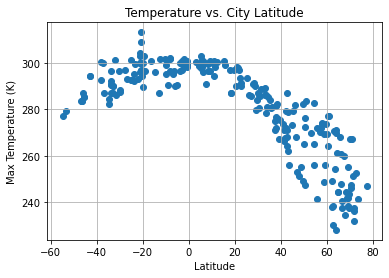

In [138]:
#Scatter plot of max temperature vs latitude for weather data after filtering out cities with humidity >100 
x_lat=weather_1_df['Latitude']
y_maxtemp=weather_1_df['Max Temp']

plt.scatter(x_lat,y_maxtemp)
plt.title('Temperature vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (K)')
plt.grid(b=True)
plt.savefig('output_data/MaxTemp_Lat_Scatter.png')

## Latitude vs. Humidity Plot

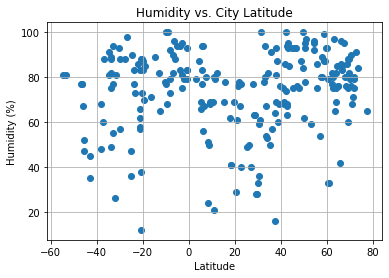

In [139]:
#Scatter plot of humidity vs latitude for weather data after filtering out cities with humidity >100 
x_lat=weather_1_df['Latitude']
y_humidity=weather_1_df['Humidity']

plt.scatter(x_lat,y_humidity)
plt.title('Humidity vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(b=True)
plt.savefig('output_data/Humidity_Lat_Scatter.png')

## Latitude vs. Cloudiness Plot

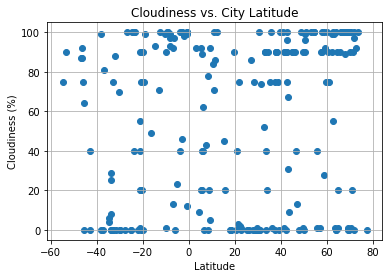

In [141]:
#Scatter plot of cloudiness vs latitude for weather data after filtering out cities with humidity >100 
x_lat=weather_1_df['Latitude']
y_cloudiness=weather_1_df['Cloudiness']

plt.scatter(x_lat,y_cloudiness)
plt.title('Cloudiness vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(b=True)
plt.savefig('output_data/Cloudiness_Lat_Scatter.png')

## Latitude vs. Wind Speed Plot

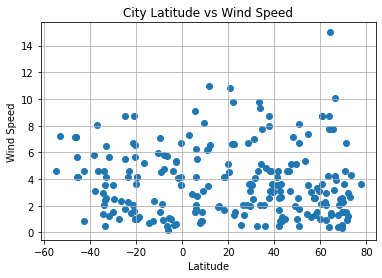

In [142]:
#Scatter plot of wind speed vs latitude for weather data after filtering out cities with humidity >100 
x_lat=weather_1_df['Latitude']
y_windspeed=weather_1_df['Wind Speed']

plt.scatter(x_lat,y_windspeed)
plt.title('City Latitude vs Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(b=True)
plt.savefig('output_data/WindSpeed_Lat_Scatter.png')

## Linear Regression

In [125]:
#Northern Hemisphere Filter (Latitude>=0), assume that the equator is grouped into Norther Hemisphere
#weather_2_df includes only cities in the norther hemisphere
northern_filter=weather_1_df.loc[:,'Latitude']>=0
weather_2_df=weather_1_df.loc[northern_filter,:]
weather_2_df.head()
weather_2_df.describe()
# len(weather_2_df)

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,1.480000e+02
mean,42.317958,2.151461,272.912162,73.020270,57.047297,3.786081,1.611804e+09
std,20.919930,96.061663,20.091272,18.449589,41.876939,2.758309,9.081560e+01
min,3.070700,-179.166700,228.010000,16.000000,0.000000,0.360000,1.611804e+09
25%,27.846200,-78.975950,256.150000,64.750000,1.000000,1.657500,1.611804e+09
50%,42.688150,1.657000,274.650000,76.500000,75.000000,3.090000,1.611804e+09
75%,61.211550,81.384825,288.820000,86.000000,92.000000,5.140000,1.611804e+09
max,77.484000,172.790200,303.150000,100.000000,100.000000,15.000000,1.611805e+09


In [126]:
#Souther Hemisphere Filter (Latitude<0)
#weather_3_df includes only cities in the southern hemisphere
southern_filter=weather_1_df.loc[:,'Latitude']<0
weather_3_df=weather_1_df.loc[southern_filter,:]
weather_3_df.head()
weather_3_df.describe()
# len(weather_3_df)

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,7.900000e+01
mean,-22.758099,18.189882,294.648987,75.012658,53.443038,3.667848,1.611804e+09
std,14.318394,96.816951,6.804238,18.069307,41.708619,2.270602,9.662728e+01
min,-54.800000,-175.200000,277.150000,12.000000,0.000000,0.190000,1.611804e+09
25%,-33.620300,-57.655150,290.150000,67.500000,2.500000,1.540000,1.611804e+09
50%,-21.207800,18.423200,296.020000,81.000000,70.000000,3.600000,1.611804e+09
75%,-9.556250,111.958300,299.985000,88.000000,95.000000,5.445000,1.611804e+09
max,-0.600000,175.850000,313.220000,100.000000,100.000000,8.750000,1.611805e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

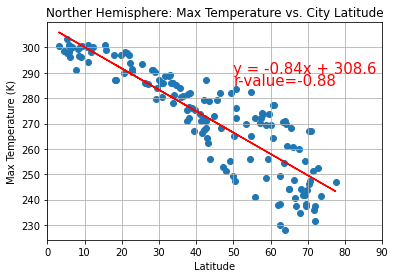

In [145]:
#Norther Hemisphere max temperature vs latitude for weather data after filtering out cities with humidity >100 
#Linear Regression

x_lat=weather_2_df['Latitude']
y_maxtemp=weather_2_df['Max Temp']
                                   
plt.scatter(x_lat,y_maxtemp)
plt.title('Norther Hemisphere: Max Temperature vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (K)')
plt.grid(b=True)
plt.xlim(0,90)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_maxtemp)
regress_values = x_lat * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(50,290),fontsize=15,color="red")
plt.annotate(f'r-value={round(rvalue,2)}',(50,285),fontsize=15,color="red")

plt.savefig('output_data/Norther_MaxTemp_Lat_Reg.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

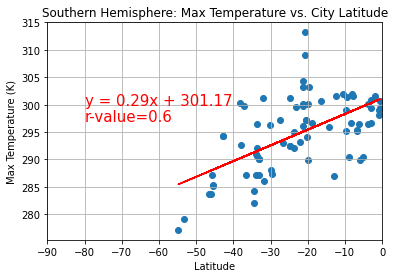

In [146]:
#SOuthern Hemisphere max temperature vs latitude for weather data after filtering out cities with humidity >100 
#Linear Regression

x_lat=weather_3_df['Latitude']
y_maxtemp=weather_3_df['Max Temp']
                                            
plt.scatter(x_lat,y_maxtemp)
plt.title('Southern Hemisphere: Max Temperature vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (K)')
plt.grid(b=True)
plt.xlim(-90,0)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_maxtemp)
regress_values = x_lat * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(-80,300),fontsize=15,color="red")
plt.annotate(f'r-value={round(rvalue,2)}',(-80,297),fontsize=15,color="red")

plt.savefig('output_data/Southern_MaxTemp_Lat_Reg.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

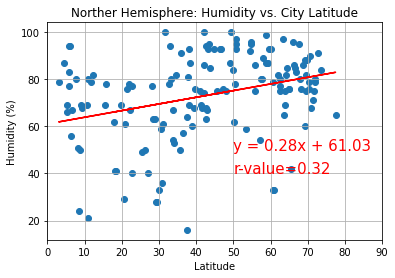

In [147]:
#Norther Hemisphere max temperature vs latitude for weather data after filtering out cities with humidity >100 
#Linear Regression

x_lat=weather_2_df['Latitude']
y_humidity=weather_2_df['Humidity']
                                          
plt.scatter(x_lat,y_humidity)
plt.title('Norther Hemisphere: Humidity vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(b=True)
plt.xlim(0,90)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_humidity)
regress_values = x_lat * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(50,50),fontsize=15,color="red")
plt.annotate(f'r-value={round(rvalue,2)}',(50,40),fontsize=15,color="red")
plt.savefig('output_data/Northern_Humidity_Lat_Reg.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

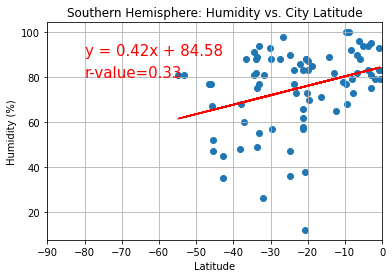

In [148]:
#Southern Hemisphere humidity vs latitude for weather data after filtering out cities with humidity >100 
#Linear Regression

x_lat=weather_3_df['Latitude']
y_humidity=weather_3_df['Humidity']
                                          
plt.scatter(x_lat,y_humidity)
plt.title('Southern Hemisphere: Humidity vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid(b=True)
plt.xlim(-90,0)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_humidity)
regress_values = x_lat * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(-80,90),fontsize=15,color="red")
plt.annotate(f'r-value={round(rvalue,2)}',(-80,80),fontsize=15,color="red")
plt.savefig('output_data/Southern_Humidity_Lat_Reg.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

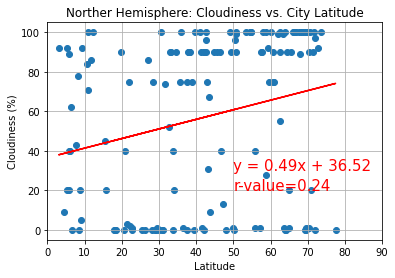

In [149]:
#Norther Hemisphere cloudiness vs latitude for weather data after filtering out cities with humidity >100 
#Linear Regression

x_lat=weather_2_df['Latitude']
y_cloudiness=weather_2_df['Cloudiness']
                                          
plt.scatter(x_lat,y_cloudiness)
plt.title('Norther Hemisphere: Cloudiness vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(b=True)
plt.xlim(0,90)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_cloudiness)
regress_values = x_lat * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(50,30),fontsize=15,color="red")
plt.annotate(f'r-value={round(rvalue,2)}',(50,20),fontsize=15,color="red")
plt.savefig('output_data/Northern_Cloudiness_Lat_Reg.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

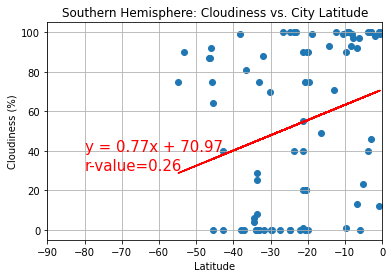

In [150]:
#Southern Hemisphere cloudiness vs latitude for weather data after filtering out cities with humidity >100 
#Linear Regression

x_lat=weather_3_df['Latitude']
y_cloudiness=weather_3_df['Cloudiness']
                                          
plt.scatter(x_lat,y_cloudiness)
plt.title('Southern Hemisphere: Cloudiness vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid(b=True)
plt.xlim(-90,0)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_cloudiness)
regress_values = x_lat * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(-80,40),fontsize=15,color="red")
plt.annotate(f'r-value={round(rvalue,2)}',(-80,30),fontsize=15,color="red")
plt.savefig('output_data/Southern_Cloudiness_Lat_Reg.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

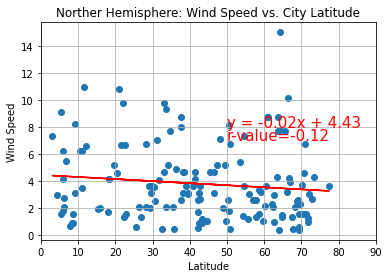

In [151]:
#Norther Hemisphere Wind Speed vs latitude for weather data after filtering out cities with humidity >100 
#Linear Regression

x_lat=weather_2_df['Latitude']
y_windspeed=weather_2_df['Wind Speed']
                                          
plt.scatter(x_lat,y_windspeed)
plt.title('Norther Hemisphere: Wind Speed vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(b=True)
plt.xlim(0,90)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_windspeed)
regress_values = x_lat * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(50,8),fontsize=15,color="red")
plt.annotate(f'r-value={round(rvalue,2)}',(50,7),fontsize=15,color="red")
plt.savefig('output_data/Northern_WindSpeed_Lat_Reg.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

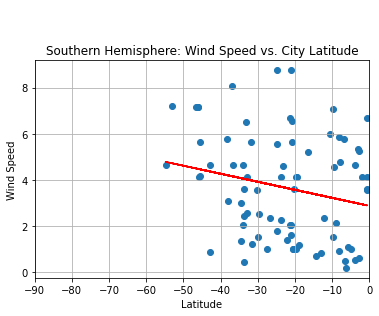

In [152]:
#Southern Hemisphere Wind Speed vs latitude for weather data after filtering out cities with humidity >100 
#Linear Regression

x_lat=weather_3_df['Latitude']
y_windspeed=weather_3_df['Wind Speed']
                                          
plt.scatter(x_lat,y_windspeed)
plt.title('Southern Hemisphere: Wind Speed vs. City Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(b=True)
plt.xlim(-90,0)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_lat, y_windspeed)
regress_values = x_lat * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.plot(x_lat,regress_values,"r-")
plt.annotate(line_eq,(-80,11),fontsize=15,color="red")
plt.annotate(f'r-value={round(rvalue,2)}',(-80,10),fontsize=15,color="red")
plt.savefig('output_data/Southern_WindSpeed_Lat_Reg.png')